In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import seaborn as sns
%matplotlib inline
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.naive_bayes import MultinomialNB

# Question 1

In [2]:
# Q1
mnist = fetch_openml('mnist_784')

In [3]:
x = mnist.data
y = mnist.target
X_train , X_test, Y_train, Y_test = train_test_split(mnist.data,mnist.target,test_size = 0.1)
X_train , X_test = (X_train.to_numpy())/255 , (X_test.to_numpy())/255
Y_train  = Y_train.cat.codes
Y_train = Y_train.to_numpy()
Y_test = Y_test.cat.codes
Y_test = Y_test.to_numpy()
meanImgArray = []


In [5]:
for i in range(10):
    tempArray = np.vstack(np.mean(X_train[np.where(Y_train==i)],axis=0))
    meanImgArray.append(tempArray)
    tempArray = []

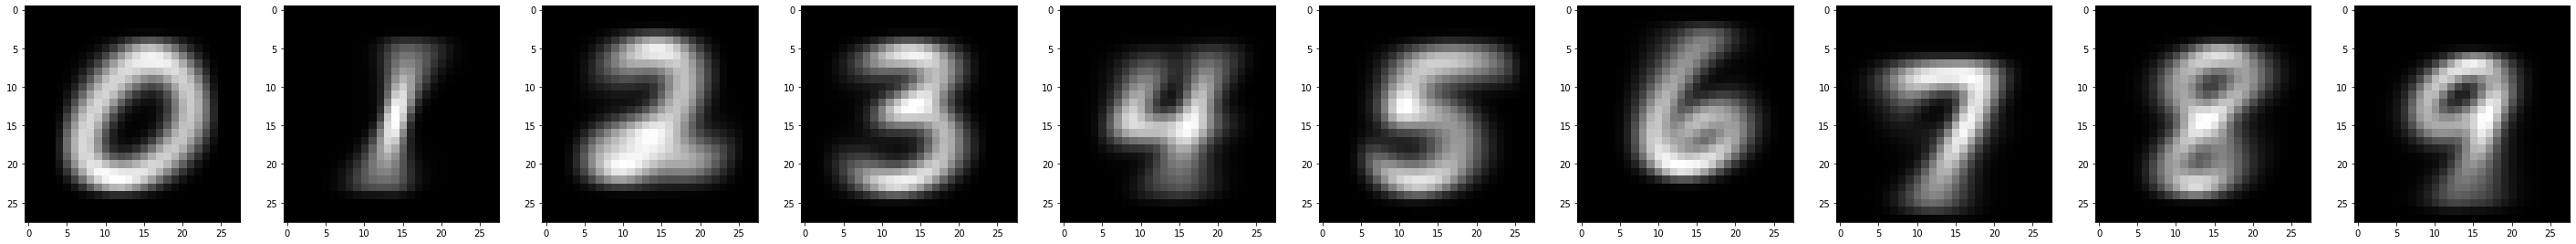

In [6]:
fig,axes=plt.subplots(1,10,figsize=[50,5])
for i in range(10):
    meanImgArray[i] = meanImgArray[i].reshape(28,28)
    axes[i].imshow(meanImgArray[i],interpolation=None,cmap='gray')

plt.show()


# Question 2

In [7]:
# Q2
# Binary - b/w 0 and 1

train_data = X_train[np.where((Y_train==0) | (Y_train==1) )]
train_target =Y_train[np.where((Y_train==0) | (Y_train==1))]
test_data = X_test[np.where((Y_test==0) | ( Y_test==1))]
test_target =Y_test[np.where((Y_test==0) | ( Y_test==1))]

print(train_data.shape)

(13308, 784)


In [8]:
clf = LinearDiscriminantAnalysis()
clf.fit(train_data, train_target)
pred_data = clf.predict(test_data)
print(pred_data.shape)

(1472,)


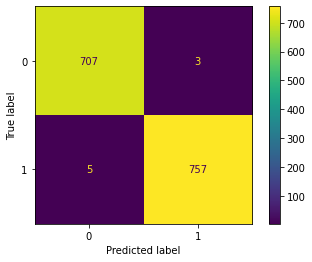

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       710
           1       1.00      0.99      0.99       762

    accuracy                           0.99      1472
   macro avg       0.99      0.99      0.99      1472
weighted avg       0.99      0.99      0.99      1472



In [10]:
cm = confusion_matrix(test_target, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
print(classification_report(test_target,pred_data))

In [11]:
# Multiclass LDA

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
pred_data = clf.predict(X_test)
print(pred_data.shape)


(7000,)


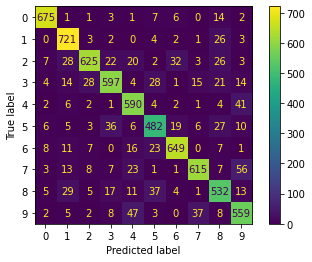

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       710
           1       0.87      0.95      0.90       762
           2       0.91      0.81      0.86       768
           3       0.86      0.82      0.84       726
           4       0.82      0.90      0.86       653
           5       0.82      0.80      0.81       600
           6       0.91      0.90      0.90       722
           7       0.91      0.84      0.87       734
           8       0.79      0.81      0.80       654
           9       0.80      0.83      0.81       671

    accuracy                           0.86      7000
   macro avg       0.86      0.86      0.86      7000
weighted avg       0.87      0.86      0.86      7000



In [12]:
cm = confusion_matrix(Y_test, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
print(classification_report(Y_test,pred_data))

In [4]:
# Load dataset
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [5]:
#Split training and testing data
x_train , x_test, Y_train, Y_test = train_test_split(mnist.data,mnist.target,test_size = 0.1)
y_train = np.array([int(Y_train[i]) for i in range(len(Y_train))])
y_test = np.array([int(Y_test[i]) for i in range(len(Y_test))])

In [6]:
# Implementing QDA
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

c:\users\geeksa67\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy:  0.5247142857142857


Text(0.5, 1.0, 'Inbuilt Function')

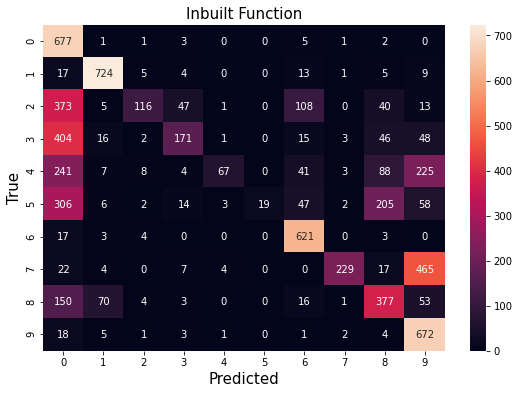

In [7]:
#Plot confusion matrix
plt.figure(figsize=[9,6])
sns.heatmap(confusion_matrix( y_test,y_pred),annot=True, fmt='.4g')
plt.ylabel('True',fontsize=15)
plt.xlabel('Predicted',fontsize=15)
plt.title('Inbuilt Function',fontsize=15)

In [8]:
# Adding noise to remove the collinearity
for i in range(len(x_train)):
  x_train[i] = x_train[i] + np.random.rand(1,len(x_train[i]))*(1**-10)


In [9]:
# Implementing QDA
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.8545714285714285


In [10]:
def qda(x,mu,pi,logdet,sigma_inverse):
  numerator = -np.inf
  y = 0
  for i in range(10):
    temp_numerator = -0.5*(np.dot(np.dot((x-mu[i]).T,sigma_inverse[i]),x-mu[i])) + np.log(pi[i]) - 0.5*logdet[i]
    if temp_numerator>numerator:
      numerator = temp_numerator
      y=i
  return y

In [11]:
#Calculate necessary values
pi=[]
mu=[]
det = []
sigma_inverse = [[] for i in range(10)]
yy = [np.where(y_train==i) for i in range(10)]
for i in range(10):
    x = x_train[yy[i]]
    pi.append(np.size(yy[i])/np.size(y_train))
    mu.append(np.mean(x,axis=0))
    sigma_i = np.cov(np.array(x), rowvar = False) 
    det.append(np.linalg.slogdet(sigma_i)[1]) #slogdet returns (det,log(det))
    sigma_inverse[i] = np.linalg.pinv(sigma_i)

In [12]:
#Prediction
y_pred_qda = []
for x in x_test:
  y_pred_qda.append(qda(x,mu,pi,det,sigma_inverse))
print('Accuracy of our function: ',accuracy_score(y_test,y_pred_qda))

Accuracy of our function:  0.8545714285714285


Text(0.5, 1.0, 'Our implementation')

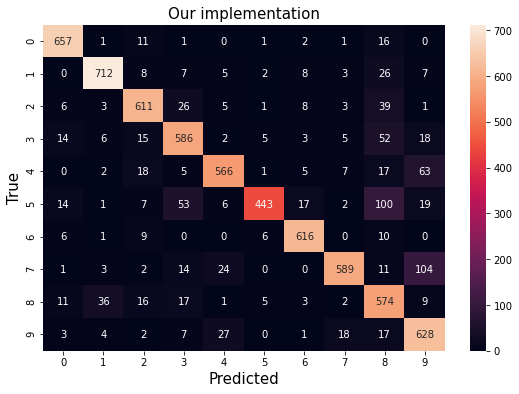

In [13]:
#Plot confusion matrix of our function
plt.figure(figsize=[9,6])
sns.heatmap(confusion_matrix( y_test,y_pred_qda),annot=True, fmt='0.4g')
plt.ylabel('True',fontsize=15)
plt.xlabel('Predicted',fontsize=15)
plt.title('Our implementation',fontsize=15)

# Question 4


In [14]:
X, y = fetch_openml('mnist_784', return_X_y=True)
X = X / 255

In [15]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [19]:
classes = np.sort(np.array(np.unique(y)))
classes

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape

((63000, 784), (7000, 784))

In [24]:
clf = MultinomialNB()

In [25]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [26]:
print(classification_report(y_pred, y_test, target_names=classes))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       690
           1       0.94      0.89      0.92       862
           2       0.83      0.86      0.84       682
           3       0.79      0.78      0.78       690
           4       0.74      0.82      0.78       594
           5       0.63      0.87      0.73       441
           6       0.93      0.87      0.90       717
           7       0.82      0.94      0.88       662
           8       0.76      0.63      0.69       834
           9       0.82      0.69      0.75       828

    accuracy                           0.82      7000
   macro avg       0.82      0.83      0.82      7000
weighted avg       0.83      0.82      0.82      7000



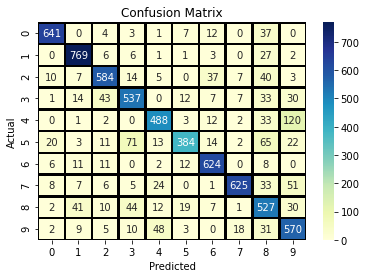

In [27]:
cm = confusion_matrix(y_test, y_pred)

ax = plt.axes()
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='YlGnBu', ax=ax, xticklabels=classes, yticklabels=classes, linewidths=1.5, linecolor='black')
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()

# Question 5

In [28]:
# Mean and variance of the two classes
class1_mu = 8
class1_sigma = np.sqrt(20)
class2_mu = 16
class2_sigma = np.sqrt(25)

In [33]:
# 50 random samples from N[5,20]
samples1 = np.random.normal(5,np.sqrt(20),50)
# 50 random samples from N[11,10]
samples2 = np.random.normal(11,np.sqrt(10),50)
# 50 random samples from N[20,8]
samples3 = np.random.normal(20,np.sqrt(8),50)

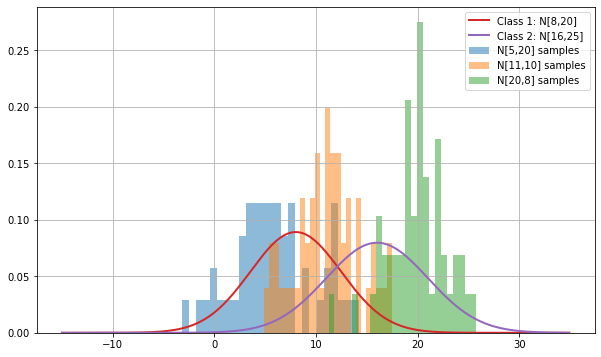

In [34]:
x = np.arange(-15,35,0.1)

plt.figure(figsize=(10, 6))
# histogram for N[5,20]
plt.hist(samples1, bins = 25, density=True, label='N[5,20] samples', alpha=0.5)
# histogram for N[11,10]
plt.hist(samples2, bins = 25, density=True, label='N[11,10] samples', alpha=0.5)
# histogram for N[20,8]
plt.hist(samples3, bins = 25, density=True, label='N[20,8] samples', alpha=0.5)

# PDF of class 1
pdf_class1 = (1/(class1_sigma*(np.sqrt(2*np.pi))))*np.exp(-(x-class1_mu)**2/(2*(class1_sigma**2)))
plt.plot(x, pdf_class1, label = 'Class 1: N[8,20]', linewidth = 2)
# PDF of class 2
pdf_class2 = (1/(class2_sigma*(np.sqrt(2*np.pi))))*np.exp(-(x-class2_mu)**2/(2*(class2_sigma**2)))
plt.plot(x, pdf_class2, label = 'Class 2: N[16,25]', linewidth = 2)

plt.grid()
plt.legend()
plt.show()

In [35]:
# Actual mean and SD for the samples
mu1 = np.mean(samples1)
sigma1 = np.std(samples1)
mu2 = np.mean(samples2)
sigma2 = np.std(samples2)
mu3 = np.mean(samples3)
sigma3 = np.std(samples3)

In [36]:
#classification function
def distribute(P1,P2,mu1,sigma1,mu2,sigma2,samples):
    n = len(samples)
    classes = [0]*n
    for i in range(n):
        sample = samples[i]
        p1 = (1/(sigma1*(np.sqrt(2*np.pi))))*np.exp(-(sample-mu1)**2 / (2*(sigma1**2)))
        p2 = (1/(sigma2*(np.sqrt(2*np.pi))))*np.exp(-(sample-mu2)**2 / (2*(sigma2**2)))
        classes[i] = 'b' if p1*P1 > p2*P2 else 'g'
    return classes

In [37]:
# sample dictionary	
samples = {
    0:samples1,
    1:samples2,
    2:samples3
}
# appriory probability dictionary
P = {
    0:[0.5,0.5],
    1:[0.3,0.7],
    2:[0.7,0.3]
}
label = {
    0:"N[5,20]",
    1:"N[11,10]",
    2:"N[20,8]"
}

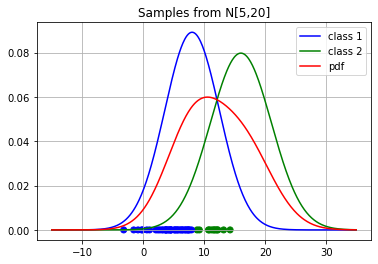

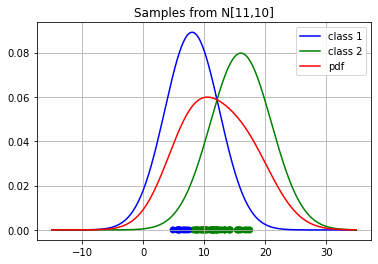

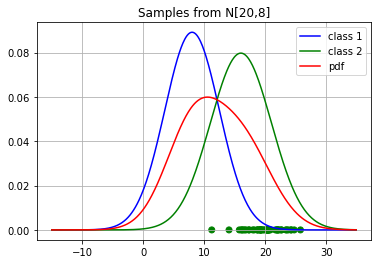

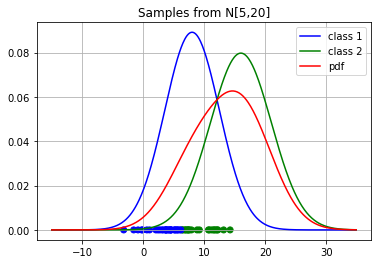

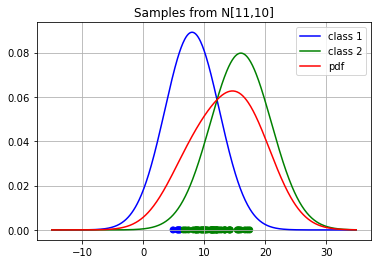

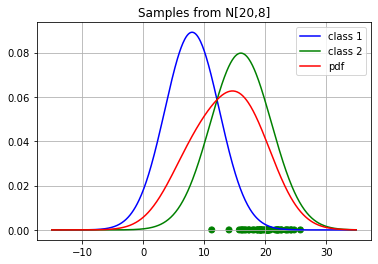

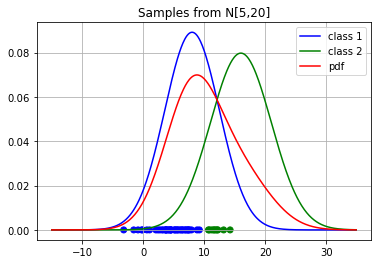

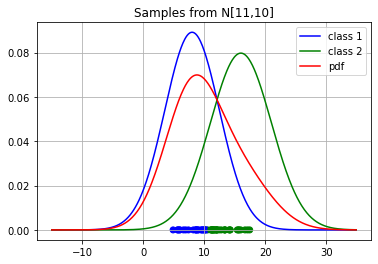

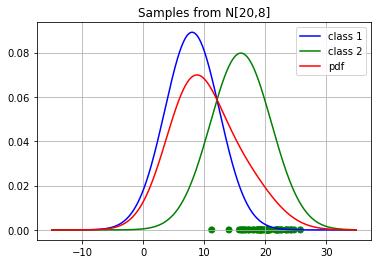

In [38]:
for j in range(3):
    P1 = P[j][0]
    P2 = P[j][1]

    for i in range(3):
		# classify
        classes = distribute(P1,P2,mu1,sigma1,mu2,sigma2,samples[i])

		# plot
        plt.plot(x,pdf_class1,'b-',label = 'class 1')
        plt.plot(x,pdf_class2,'g-',label = 'class 2')

		# merge
        pdf = P1*pdf_class1  + P2*pdf_class2
        plt.plot(x,pdf,'r-',label = 'pdf')

		# plot classification
        plt.scatter(samples[i],np.zeros_like(samples[i]),c = classes)
        plt.title("Samples from " + label[i])
        plt.grid()
        plt.legend()
        plt.show()